In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
categorical = pd.read_csv('categorical.csv')
numerical = pd.read_csv('numerical.csv')
target = pd.read_csv('target.csv')

data = pd.concat([categorical,numerical,target],axis=1)

In [31]:
data.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B,TARGET_D
0,IL,36,H,F,3,L,E,C,T,2,...,12.0,10.0,4,7.741935,95515,0,4,39,0,0.0
1,CA,14,H,M,3,L,G,A,S,1,...,25.0,25.0,18,15.666667,148535,0,2,1,0,0.0
2,NC,43,U,M,3,L,E,C,R,2,...,16.0,5.0,12,7.481481,15078,1,4,60,0,0.0
3,CA,44,U,F,3,L,E,C,R,2,...,11.0,10.0,9,6.812500,172556,1,4,41,0,0.0
4,FL,16,H,F,3,L,F,A,S,2,...,15.0,15.0,14,6.864865,7112,1,2,26,0,0.0


In [44]:
target_d = data[data['TARGET_D']!=0]

In [7]:
#checking for NaNs
nulls = [column for column in data if data[column].isna().sum() > 0]
nulls       

[]

In [9]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [11]:
#balacning data - upsampling
no_donate = data[data['TARGET_B']==0]
yes_donate = data[data['TARGET_B']==1]

from sklearn.utils import resample
yes_donate_oversampled = resample(yes_donate, 
                                    replace=True,
                                    n_samples = len(no_donate),
                                    random_state=42)


display(no_donate.shape)
display(yes_donate_oversampled.shape)

(90569, 338)

(90569, 338)

In [12]:
oversampled = pd.concat([no_donate,yes_donate_oversampled])

In [13]:
#X-Y Split, train-test split

X = oversampled.drop(['TARGET_B','TARGET_D'],axis=1)
y = oversampled['TARGET_B']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
#cat/num X-train
#make a split between the continuous and discrete variables as I don't want to scale or encode the discrete ones, I want to keep their current values
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(object)

#cat/num X-test
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(object)


from sklearn.preprocessing import StandardScaler
#Scale X-train
transformer = StandardScaler().fit(X_train_num)
X_scaled_train = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)

#Scale X-test
X_scaled_test = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_scaled_test

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,1.183389,0.625542,0.158571,0.530254,-0.029287,-1.321067,-0.312305,1.333549,-0.616153,0.963635,...,-0.329385,0.288120,0.240740,0.62566,-0.414378,0.543435,1.554931,-0.997120,0.830744,-1.160226
1,-0.000647,0.625542,0.158571,1.112107,-0.029287,-1.321067,-0.312305,0.960305,-0.098946,0.412252,...,-0.963648,0.837178,-0.170877,-0.09354,0.139921,0.220483,-0.955641,-0.997120,-0.948256,-0.948117
2,-1.393631,-0.977303,1.533867,-0.051598,-0.029287,0.993159,2.593052,-0.159428,1.194071,0.412252,...,-0.752227,0.288120,0.240740,0.62566,0.555646,0.391275,0.868164,-0.997120,-0.948256,-0.152707
3,0.138651,0.625542,1.533867,1.403033,-0.029287,-1.321067,-0.312305,1.333549,-1.391962,0.963635,...,-0.963648,1.386236,0.034931,0.26606,0.139921,0.686279,1.081938,-0.997120,-0.948256,1.013894
4,-0.000647,-2.580148,0.158571,-0.051598,-0.029287,0.345176,-0.635122,-0.159428,0.676864,0.412252,...,-0.963648,0.288120,-0.129715,-0.02162,-1.107252,-0.058995,-1.701021,-0.997120,-0.948256,-1.054172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36223,-0.070297,0.625542,0.158571,-0.924377,-0.029287,1.548573,-0.635122,-1.652405,0.676864,-0.690512,...,-0.963648,-0.480561,-0.170877,-0.09354,4.020016,-0.263946,-0.855038,-0.997120,-0.948256,-0.789035
36224,-1.393631,0.625542,1.533867,-1.215303,-0.029287,-0.163954,1.624599,-1.652405,-0.098946,-0.690512,...,0.304878,-0.535467,-0.170877,-0.45314,-0.552953,-0.365873,-1.660971,1.002889,-0.058756,-0.205734
36225,-1.881175,-0.977303,-1.216726,-0.633451,-0.029287,0.900590,-0.635122,-1.279161,0.935467,0.412252,...,0.304878,-0.260938,-0.047392,0.12222,-0.691528,-0.001666,-0.115493,-0.997120,-0.948256,-1.584445
36226,-1.672228,0.625542,0.158571,-0.051598,-0.029287,-0.441661,-0.635122,-0.532672,-0.357549,-1.241894,...,0.093457,-0.590373,-0.582494,-0.81274,-0.691528,-0.831670,0.816021,-0.997120,0.830744,0.748758


In [16]:
from sklearn.preprocessing import OneHotEncoder
#Create encoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

#encode train
encoded_train = encoder.transform(X_train_cat).toarray()
encoded_train = pd.DataFrame(encoded_train)

#encode test
encoded_test = encoder.transform(X_test_cat).toarray()
encoded_test = pd.DataFrame(encoded_test)


In [92]:
train_scaled = pd.concat([encoded_train,X_scaled_train],axis=1)
test_scaled = pd.concat([encoded_test,X_scaled_test],axis=1)
df = pd.concat([test_scaled,train_scaled],axis=0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(train_scaled, y_train)
print(clf.score(train_scaled, y_train))
print(clf.score(test_scaled, y_test))

0.614546960182182
0.6125648669537375


In [21]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
cross_val_scores = cross_val_score(clf, train_scaled, y_train, cv=10)
print(np.mean(cross_val_scores))
print(cross_val_scores)


0.6112621627216893
[0.61120696 0.60527224 0.60996481 0.60458215 0.61286316 0.61665862
 0.60768753 0.61258712 0.61369126 0.61810779]


In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [95]:
clf = RandomForestClassifier(max_depth=10,
                             min_samples_split=20,
                             min_samples_leaf =20).fit(train_scaled, y_train)

pred_RF = clf.predict(test_scaled)

print('accuracy:', accuracy_score(y_test, pred_RF))
print("precision: ",precision_score(y_test,pred_RF))
print("recall: ",recall_score(y_test,pred_RF))
print("f1: ",f1_score(y_test,pred_RF))

accuracy: 0.8044330352213758
precision:  0.7885599131917532
recall:  0.8360359373288047
f1:  0.8116042226181296


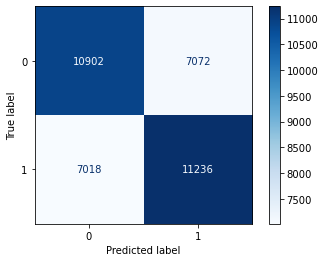

In [28]:
plot_confusion_matrix(clf, test_scaled, y_test,cmap=plt.cm.Blues)  
plt.show()

In [46]:
round(target_d['TARGET_D'].mean(),2)

15.62

In [52]:
donation_gained = 11236 * 15.62
donation_lost = 7018 * 15.62
spend_marketing = (7072+11236) * 0.68
no_return_marketing = 7072 * 0.68

print('Donation amount gained:',round(donation_gained,2))
print('Donation amount lost:',round(donation_lost,2))
print('Amount spend on marketing:',round(spend_marketing,2))
print('Amount lost on marketing:',round(no_return_marketing,2))

Donation amount gained: 175506.32
Donation amount lost: 109621.16
Amount spend on marketing: 12449.44
Amount lost on marketing: 4808.96


In the above plot we can see that there are 7018 people of whom the model predicts they won't donate, when they actually would donate, AKA falsely predicted non-donators. There are also 7072 people of whom the model predicts they will donate, when they actually don't. When we look at the average donation amount of someone who actually donates this lays around 15.62 dollars. As also becomes clear in the calculations above, we can see that with the current model we miss out on 109.621 dollars of donations by not sending marketing efforts to these 7018 falsely predicted non-donators. This is a huge amount when you see that we only raise 175.506 dollars with this model. 

Zooming in on the costs to send the marketing packages: in this scenario we spend a total of 12.449 dollars on marketing. Of which 4808 dollars does not yield any donation. When we compare this with the 109.621 dollars we are missing out off by not sending them anything, we can clearly conclude that it's in the best interest of Healthcare 4 All to have a model in which we have the lowest amount of falsely predicted non-donators. 

In order to improve this model I would use GridSearch or Random Search to be able to improve my RandomForest model. If that does not help enough I would use SMOTE to balance my data and then run the same model. If that also isn't enough I will use a Logistic Regression with manual weights to minimize the number of falsely predicted non-donators. 